# AML Assignment 1 
<h3>K-Means Clustering </h3>

Done by: <b>Piyush Bhupendra Parsai</b><br>MIS#    :<b>712352029<b>

## <h3> Problem Statement:</h3>
Implement K-means clustering on Iris Flower dataset for k=3 clusters without using class labels and evaluate the models performance based on its accuracy and test the results of the model against the existing labels in the dataset.

## <h3>Execution<h3>

### <h3>import libraries<h3>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # import k-means lib

### <h4>Load the dataset </h4>

Find the dataset file from the assignment folder. 
It is available as Data.tsv, i.e., in a tab separated format.
The data contains 150 sample points. Each sample has 4 features, i.e., sepal length, sepal width, petal length and petal width.

In [2]:
# Use pandas read_table method to load tab saperated dataset in a DataFrame
iris_df = pd.read_table("file:///C:/temp/data/Data.tsv", names=["sepal_length", "sepal_width", "petal_length", "petal_width"])

<b>Explore the dataset</b>

In [3]:
# Print basic info from the dataset.
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.515825e-15,-1.823726e-15,-1.610564e-15,-9.000208e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [5]:
# Check for null values
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [6]:
# Print first 10 entries of the dataset
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,-1.143017,0.098217,-1.283389,-1.315444
1,-0.779513,-0.822570,0.080709,0.264142
2,-0.173674,-0.592373,0.421734,0.132510
3,0.310998,-0.592373,0.137547,0.132510
4,-0.173674,3.090775,-1.283389,-1.052180
5,-1.748856,-0.131979,-1.397064,-1.315444
6,-0.658345,1.479398,-1.283389,-1.315444
7,-0.052506,2.169988,-1.453901,-1.315444
8,-1.021849,-0.131979,-1.226552,-1.315444
9,0.189830,-1.973554,0.137547,-0.262387


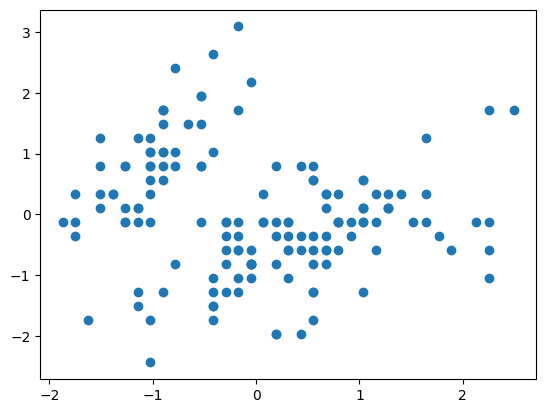

In [7]:
# Scatter plot of sepal_length vs sepal_width
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'])
plt.show()

### <h3>Implement a basic K-means models on the features in the dataset.</h3>

<b>Load the DataFrame in an array</b>

In [8]:
iris_arr = iris_df.to_numpy()

<b>Initialize the centroids</b><br>
Initialize centroid as given in assignment.<br>
[[ 1.03800476 0.09821729 1.0469454 1.58046376 ]<br>
[ 0.18982966 -1.97355361 0.70592084 0.3957741 ]<br>
[ 1.2803405 0.09821729 0.76275827 1.44883158 ]]<br>

In [9]:
# Initialize centroids
initial_centroids = np.array(
    [
        [1.03800476, 0.09821729, 1.0469454, 1.58046376],
        [0.18982966, -1.97355361, 0.70592084, 0.3957741], 
        [1.2803405, 0.09821729, 0.76275827, 1.44883158]
    ],
    np.float64)

print(initial_centroids)

[[ 1.03800476  0.09821729  1.0469454   1.58046376]
 [ 0.18982966 -1.97355361  0.70592084  0.3957741 ]
 [ 1.2803405   0.09821729  0.76275827  1.44883158]]


<b>Run K-means on the Iris dataset with k = 3, i.e., 3 clusters</b>

In [10]:
# Run k-means clustering for k=3
classifier = KMeans(n_clusters = 3, init = initial_centroids)
predictions = classifier.fit_predict(X=iris_arr)
predictions.shape

(150,)

In [11]:
# Print the output predictions
print(predictions)

[1 2 2 2 1 1 1 1 1 2 0 1 2 1 1 2 1 2 1 1 1 0 1 2 1 2 1 2 1 1 1 2 2 0 1 1 1
 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 2 2 1 0 2 1 1 1
 1 0 2 0 2 2 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 0 2 0 0 2 2 2 0 0 2 2 2 0 2 0 0
 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 2 2
 2 0]


In [12]:
# Compare intial centroids with final centroids
print(f'Intial Centroids: \n{initial_centroids}\n')
print(f'Final Centroids: \n {classifier.cluster_centers_}')

Intial Centroids: 
[[ 1.03800476  0.09821729  1.0469454   1.58046376]
 [ 0.18982966 -1.97355361  0.70592084  0.3957741 ]
 [ 1.2803405   0.09821729  0.76275827  1.44883158]]

Final Centroids: 
 [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


### <h3>Visualize the clusters</h3>

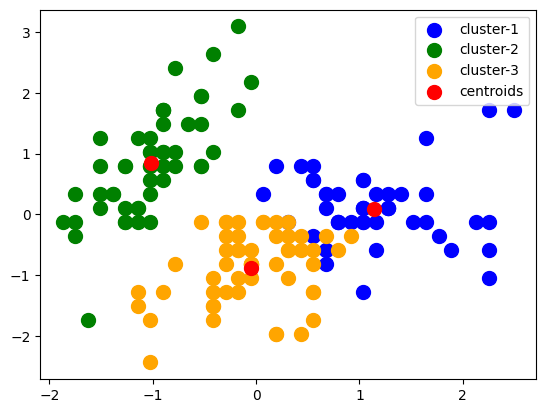

In [13]:
# Visualising the clusters
plt.scatter(iris_arr[predictions == 0, 0], iris_arr[predictions == 0, 1], s = 100, c = 'blue', label = 'cluster-1')
plt.scatter(iris_arr[predictions == 1, 0], iris_arr[predictions == 1, 1], s = 100, c = 'green', label = 'cluster-2')
plt.scatter(iris_arr[predictions == 2, 0], iris_arr[predictions == 2, 1], s = 100, c = 'orange', label = 'cluster-3')

# Plot the centroids
plt.scatter(classifier.cluster_centers_[:, 0], classifier.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

plt.legend()

### <h3>Save the results</h3>

Your K-means must output a file named kmeans_output.tsv that contains the
cluster assignments for each point in Data.tsv. In particular, you should use the
same ordering for the data points as in Data.tsv; the file should have one line with
tabs separating the cluster labels for each point.

In [14]:
# Initialize path the save results
path_to_save = fr'c:\temp\data\kmeans_output.tsv'

# Load prediction results in pandas DataFrame
cluster_result = pd.DataFrame(predictions).T

# Save the results from DataFrame to file as tab saperated values
cluster_result.to_csv(path_or_buf=path_to_save,
                      sep="\t",
                      header=False,
                      index=False)

### <h3>Check accuracy</h3>

The script autograderClustering.py can be used for testing the accuracy of your model.
Run the script as:<br>
<i>python autograderClustering.py kmeans_output.ts</i>

Accuracy of the model (found using autograderClustering.py) = 83.33333333333334

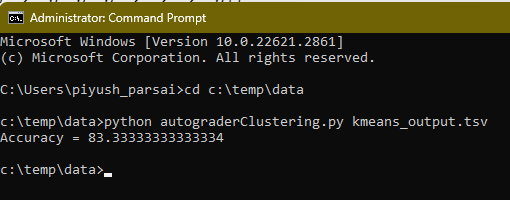

